# Fleet utilization rate
To show the utilization of the bike sharing service, we calculate the utilization rate. It denotes the proportion of bikes used per hour out of the total number of available bikes in the provider's fleet.
$$ \text{utilization rate} = {\text{used bikes}\over \text{amount of available bikes}} $$
### Load data
In *data_preparation.ipynb* we have already created a table in which the trips have been decomposed according to the times of day (hours). This allows us to easily calculate the utilization rate based on the number of rows in a given hour.

In [48]:
import pandas as pd
import numpy as np
df_splitted_trips = pd.read_csv('./data/prepared/rides_data_split_into_hours.csv', dtype={'start_station_id': np.int64, 'end_station_id': 'string', 'end_station_name': 'string', 'start_station_name': 'string', 'bike_id': np.int64, 'user_type': 'string'})
df_splitted_trips['start_time'] = pd.to_datetime(df_splitted_trips['start_time'], format='%Y-%m-%d %X')
df_splitted_trips['end_time'] = pd.to_datetime(df_splitted_trips['end_time'], format='%Y-%m-%d %X')
df_splitted_trips['Date'] = df_splitted_trips['start_time'].dt.date
df_splitted_trips['Time of day (hour)'] = df_splitted_trips['start_time'].dt.hour
amountOfBikes = len(df_splitted_trips['bike_id'].unique())
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_splitted_trips = df_splitted_trips.copy()
df_splitted_trips['Weekday'] = df_splitted_trips['start_time'].dt.day_name()

### Calculate utilization rate per hour

To calculate the usage rate, we need to calculate the number of bicycles used for each row. Subsequently, this is set in relation to the total number of bicycles.

In [ ]:
import seaborn as sns
df_utilization_rate_per_hour = df_splitted_trips.copy()
df_utilization_rate_per_hour = df_utilization_rate_per_hour.groupby(['Date', 'Weekday', 'Time of day (hour)']).nunique()
df_utilization_rate_per_hour['Utilization rate in %'] = df_utilization_rate_per_hour['bike_id']/amountOfBikes*100
df_utilization_rate_per_hour.head()

start_time  end_time  \
Date       Weekday  Time of day (hour)                         
2015-01-01 Thursday 0                            4         4   
                    1                            4         4   
                    2                            1         1   
                    4                            1         1   
                    8                            4         4   

                                        start_station_id  end_station_id  \
Date       Weekday  Time of day (hour)                                     
2015-01-01 Thursday 0                                  3               3   
                    1                                  4               4   
                    2                                  1               1   
                    4                                  1               1   
                    8                                  4               4   

                                        start_station_name  end_station_name  \
Date       Weekday  Time of day (hour)                                         
2015-01-01 Thursday 0                                    3                 3   
                    1                                    4                 4   
                    2                                    1                 1   
                    4                                    1                 1   
                    8                                    4                 4   

                                        bike_id  user_type  trip_length  \
Date       Weekday  Time of day (hour)                                    
2015-01-01 Thursday 0                         4          1            4   
                    1                         4          2            4   
                    2                         1          1            1   
                    4                         1          1            1   
                    8                         3          1            4   

                                        start_station_latitude  \
Date       Weekday  Time of day (hour)                           
2015-01-01 Thursday 0                                        3   
                    1                                        4   
                    2                                        1   
                    4                                        1   
                    8                                        4   

                                        start_station_longitude  \
Date       Weekday  Time of day (hour)                            
2015-01-01 Thursday 0                                         3   
                    1                                         4   
                    2                                         1   
                    4                                         1   
                    8                                         4   

                                        end_station_latitude  \
Date       Weekday  Time of day (hour)                         
2015-01-01 Thursday 0                                      3   
                    1                                      4   
                    2                                      1   
                    4                                      1   
                    8                                      4   

                                        end_station_longitude  date_time  \
Date       Weekday  Time of day (hour)                                     
2015-01-01 Thursday 0                                       3          2   
                    1                                       4          2   
                    2                                       1          1   
                    4                                       1          1   
                    8                                       4          2   

                                        times_tmp  Utili

### Insert utilization rate of 0 for hours without ride

If no trip has taken place in an hour, an Utilization Rate of 0% must be inserted in this line.

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

df_utilization_rate_per_hour_reset = df_utilization_rate_per_hour.reset_index(level=1)

indexes = df_utilization_rate_per_hour_reset.index.to_list()
hours = set(range(24))

dict_rides_with_hours = {}
for index in indexes:
    if index[0] not in dict_rides_with_hours.keys():
        dict_rides_with_hours[index[0]] = set([index[1]])
    else:
        dict_rides_with_hours[index[0]].add(index[1])
dict_rides_without_hours = {}
for key, value in dict_rides_with_hours.items():
    missing_hours = hours - value
    if key not in dict_rides_without_hours.keys():
        dict_rides_without_hours[key] = missing_hours
df_utilization_rate_per_hour_reset2 = df_utilization_rate_per_hour_reset.reset_index()
df_utilization_rate_per_hour_reduced = df_utilization_rate_per_hour_reset2[['Date','Time of day (hour)','Utilization rate in %']]
for key, value in dict_rides_without_hours.items():
    for hour in value:
        df_utilization_rate_per_hour_reduced.loc[len(df_utilization_rate_per_hour_reduced.index)] = [key, hour, 0]
    
df_utilization_rate_per_hour_reduced.sort_values(by=['Date', 'Time of day (hour)'], inplace=True)        
df_utilization_rate_per_hour_reduced=df_utilization_rate_per_hour_reduced.reset_index(drop=True)
df_utilization_rate_per_hour_reduced.head()

,Date,Time of day (hour),Utilization rate in %
0,2015-01-01,0,0.268817
1,2015-01-01,1,0.268817
2,2015-01-01,2,0.067204
3,2015-01-01,3,0.000000
4,2015-01-01,4,0.067204


### Boxplot: Distribution of hourly utilization rate

To show the distribution of the utilization rate, we use a boxplot.

<AxesSubplot: xlabel='Time of day (hour)', ylabel='Utilization rate in %'>

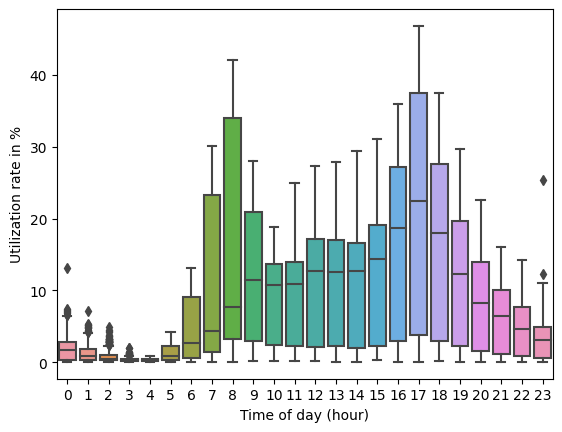

In [ ]:
df_utilization_rate_per_hour_reset_index = df_utilization_rate_per_hour.reset_index(level=2)
sns.boxplot(data=df_utilization_rate_per_hour_reset_index, x='Time of day (hour)', y='Utilization rate in %')

Findings:
- This is an asymmetric distribution, as the median is usually not in the middle of the box
- The wide interquartile ranges (wide boxes) indicate that the dispersion is large and the Utilization Rate per hour differs greatly. In particular, during the hours of 6 am to 11 pm, the dispersion is large.
- From 6 am to 11 pm, the boxplots also show long whiskers. This also indicates a broad distribution.
- Outliers only appear at the times between 11 pm and 3 am
- The boxplots show a wide range, especially during the day. At 5 pm, for example, utilization rates of approx. 0 to approx. 47 % can be observed.

<AxesSubplot: xlabel='Time of day (hour)', ylabel='Utilization rate in %'>

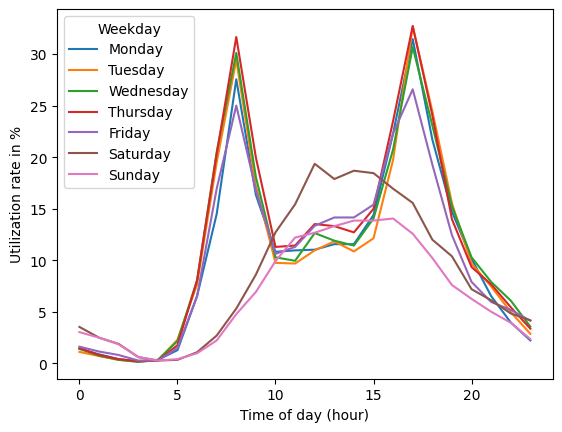

In [ ]:
df_utilization_rate_median_per_hour = df_utilization_rate_per_hour.groupby(['Weekday','Time of day (hour)'])['Utilization rate in %'].median().reset_index()
df_utilization_rate_median_per_hour['Weekday'] = pd.Categorical(df_utilization_rate_median_per_hour['Weekday'],categories=days)
df_utilization_rate_median_per_hour = df_utilization_rate_median_per_hour.sort_values('Weekday')
sns.lineplot(data=df_utilization_rate_median_per_hour, x='Time of day (hour)', y='Utilization rate in %', hue='Weekday')

Findings:
- On work days, the utilization rate is highest at 8 am and 5 pm. This is probably due to the trips to and from work.
- On Saturday and Sunday, the usage rate is highest approximately between 12 pm and 3 pm. Here the bicycles are probably used for free time activities.

### Median of utilization rate per day

The following plot represents the median of the utilization rate per day over the year.

<AxesSubplot: xlabel='Date', ylabel='Utilization Rate'>

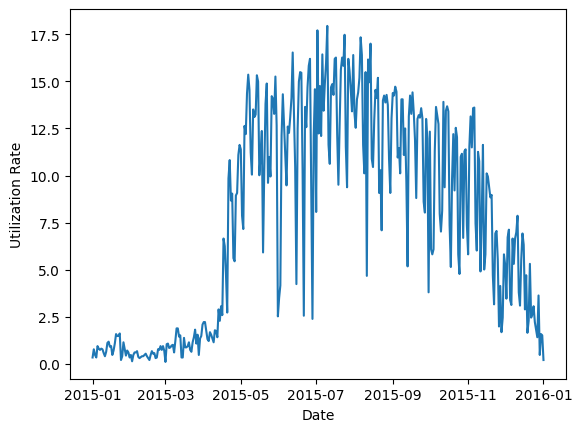

In [ ]:
df_utilization_rate_per_day = df_splitted_trips.copy()
df_utilization_rate_per_day = df_utilization_rate_per_day.groupby(['Date', 'Time of day (hour)']).nunique()
df_utilization_rate_per_day['Utilization Rate'] = df_utilization_rate_per_day['bike_id']/amountOfBikes*100
df_utilization_rate_per_day = df_utilization_rate_per_day.groupby('Date')['Utilization Rate'].median().reset_index()
sns.lineplot(data=df_utilization_rate_per_day, x='Date', y='Utilization Rate')

### Median of utilization rate per week

The following plot represents the median of the utilization rate per week over the year.

<AxesSubplot: xlabel='Week', ylabel='Utilization Rate'>

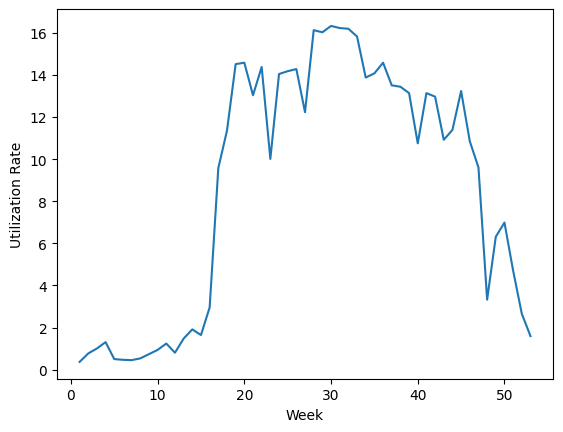

In [ ]:
df_utilization_rate_per_week = df_splitted_trips.copy()
df_utilization_rate_per_week['Week'] = df_utilization_rate_per_week['start_time'].dt.isocalendar().week
df_utilization_rate_per_week = df_utilization_rate_per_week.groupby(['Date', 'Week', 'Time of day (hour)']).nunique()
df_utilization_rate_per_week['Utilization Rate'] = df_utilization_rate_per_week['bike_id']/amountOfBikes*100
df_utilization_rate_per_week = df_utilization_rate_per_week.groupby(['Week', 'Time of day (hour)'])['Utilization Rate'].median().reset_index()
df_utilization_rate_per_week = df_utilization_rate_per_week.groupby('Week')['Utilization Rate'].median().reset_index()
sns.lineplot(data=df_utilization_rate_per_week, x='Week', y='Utilization Rate')

# Bike utilization rate
With the Bike Utilization Rate, we calculate per bike how many minutes per hour the bike is used. 
$$ \text{Bike Utilization Rate} = {\text{Minutes bike is used}\over \text{hour}} $$

<AxesSubplot: xlabel='Time of day (hour)', ylabel='bike_utilization_rate'>

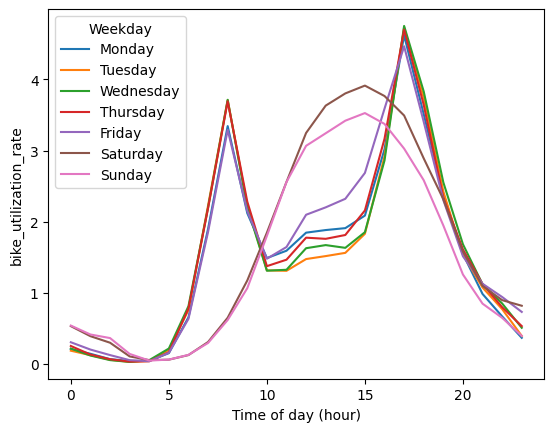

In [ ]:
df_bike_utilization_rate = df_splitted_trips.copy()
df_bike_utilization_rate = df_splitted_trips.groupby(['bike_id', 'Date', 'Weekday', 'Time of day (hour)']).sum(['trip_length'])
df_bike_utilization_rate = df_bike_utilization_rate.reset_index()
# get sum of trip_length per day and hour in seconds
df_bike_utilization_rate = df_bike_utilization_rate.groupby(['Date', 'Weekday', 'Time of day (hour)']).sum(['trip_length'])
df_bike_utilization_rate['bike_utilization_rate'] = df_bike_utilization_rate['trip_length']/amountOfBikes/60
df_bike_utilization_rate = df_bike_utilization_rate.reset_index()
df_bike_utilization_rate_mean_per_hour = df_bike_utilization_rate.groupby(['Weekday','Time of day (hour)'])['bike_utilization_rate'].mean().reset_index()
df_bike_utilization_rate_mean_per_hour['Weekday'] = pd.Categorical(df_bike_utilization_rate_mean_per_hour['Weekday'],categories=days)
df_bike_utilization_rate_mean_per_hour = df_bike_utilization_rate_mean_per_hour.sort_values('Weekday')
sns.lineplot(data=df_bike_utilization_rate_mean_per_hour, x='Time of day (hour)', y='bike_utilization_rate', hue='Weekday')

Findings:
- The curves show how many minutes each bicycle was used on average per hour
- The Y-axis shows the length of use per bike in minutes per hour
- The X-axis shows the time of day from 0 am to 23 pm.
- The longest travel time per hour is on Saturdays. On average, it is higher than on other days of the week at all times
- Saturdays at 2 pm is the highest travel time, averaging 18 minutes per hour per bike

### Revenue

![caption](data/thehubway_revenue_modell_2015.png)

The revenue modell above was exported from the Blue-Bikes Page in 2015 and access through the wayback machine. According to the modell, the revenue generated split in two parts: The fixed income through either subscription or 24/72-Hour passes and the variable income generated through overtime. 

Because we don't have any data to clearly identify the subscriber-id or unique temporary pass-id for each trip, it is impossible to account the direct contribution of the fixed income part to each trip. Additionally, we only have a small fraction of the entire dataset (roughly 1,3 Million Trips in base Dataset, see https://web.archive.org/web/20160208155519/http://www.thehubway.com/mediakit compared to 112k Trips in the dataset provided) and only know the subscriber numbers and number of temporary passes sold for the entire 2015 dataset. Because we can't clearly account the fixed income part of each trip, we can't interpolate the subscriber/temporary pass users for the smaller dataset. This means that, theoretically speaking, all the trips undertaken by subscribers in the smaller dataset could have be completed from the same subscriber. While this is highly unlikely, we can't fully rule out the possiblity - because we can't make any statements about the fixed part of the income generated by each trip. 

For this reason, we decided to remove the fixed income part from the entire revenue analysis and only focus on the revenue generated through overtime. In the following analysis, we will first calculate the overtime generated for each trip and afterwords look into different findings for the overtime revenue.   

#### Load Processed Dataframe

In [ ]:
df_boston = pd.read_csv('./data/prepared/rides_data_prepared.csv', dtype={'start_station_id': np.int64, 'end_station_id': 'string', 'end_station_name': 'string', 'start_station_name': 'string', 'bike_id': np.int64, 'user_type': 'string'})
df_boston['start_time'] = pd.to_datetime(df_boston['start_time'], format='%Y-%m-%d %X')
df_boston['end_time'] = pd.to_datetime(df_boston['end_time'], format='%Y-%m-%d %X')
# Using end_time instead of start_time because revenue is only generated AFTER the trip as during the trip it is not clear how much revenue we get from the ride
df_boston['date'] = df_splitted_trips['end_time'].dt.date
df_boston['time_of_day_hour'] = df_splitted_trips['end_time'].dt.hour
df_boston['weekday'] = df_boston['end_time'].dt.day_name()
df_boston['month'] = df_boston['end_time'].dt.month_name()

def calculateOvertimeRevenue(tripLengthInSec, userType):
    revenue = 0.0
    # 31 min 
    if(tripLengthInSec >= 1860):
        revenue += 2
    # 61 Min 
    if(tripLengthInSec >= 3660):
        revenue += 4
    
    if(tripLengthInSec > 5400):
        tripLenghtLonger90MinInSec = tripLengthInSec - 5400
        revenue += np.ceil(tripLenghtLonger90MinInSec / 1800) * 8 

    if(userType == 'Subscriber'):
        # Apply 25% discount for subs
        revenue = revenue*0.75
    
    return revenue

df_boston['revenue_through_overtime'] = df_boston.apply(lambda row: calculateOvertimeRevenue(row.trip_length, row.user_type), axis=1)

df_boston_only_overtime_rides = df_boston[df_boston['revenue_through_overtime'] > 0]

df_boston_only_overtime_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55474 entries, 59 to 1106090
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   start_time                55474 non-null  datetime64[ns]
 1   end_time                  55474 non-null  datetime64[ns]
 2   start_station_id          55474 non-null  int64         
 3   end_station_id            55474 non-null  string        
 4   start_station_name        55474 non-null  string        
 5   end_station_name          55474 non-null  string        
 6   bike_id                   55474 non-null  int64         
 7   user_type                 55474 non-null  string        
 8   trip_length               55474 non-null  float64       
 9   start_station_latitude    55474 non-null  float64       
 10  start_station_longitude   55474 non-null  float64       
 11  end_station_latitude      55474 non-null  float64       
 12  end_station_lon

<AxesSubplot: xlabel='revenue_through_overtime', ylabel='Count'>

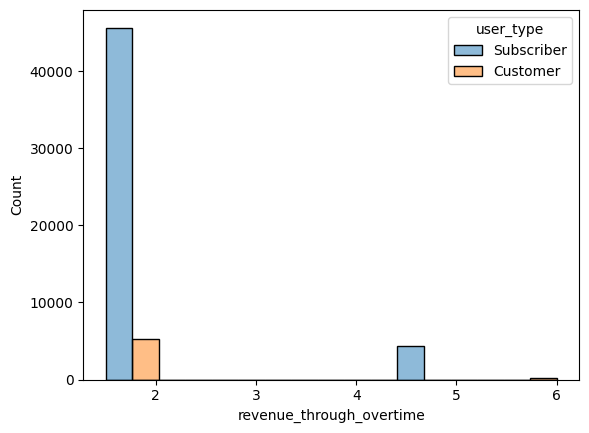

In [ ]:
import seaborn as sns

sns.histplot(df_boston_only_overtime_rides, x='revenue_through_overtime', hue='user_type')


percent of userbase subscriber: 0.6660196474453439
percent of userbase Customer: 0.3339803525546561
total number of OT-Rides: 55474
total number of subscriber rides: 49998
total number of customer rides: 5476
percent of OT-rides from subscriber: 0.9012870894473086
percent of OT-rides from customer: 0.09871291055269135
sum of subscriber OT revenue: 88017.0
sum of customer OT revenue: 11972.0
percent of Subscriber OT revenue: 0.8802668293512287
percent of customer OT revenue: 0.11973317064877137


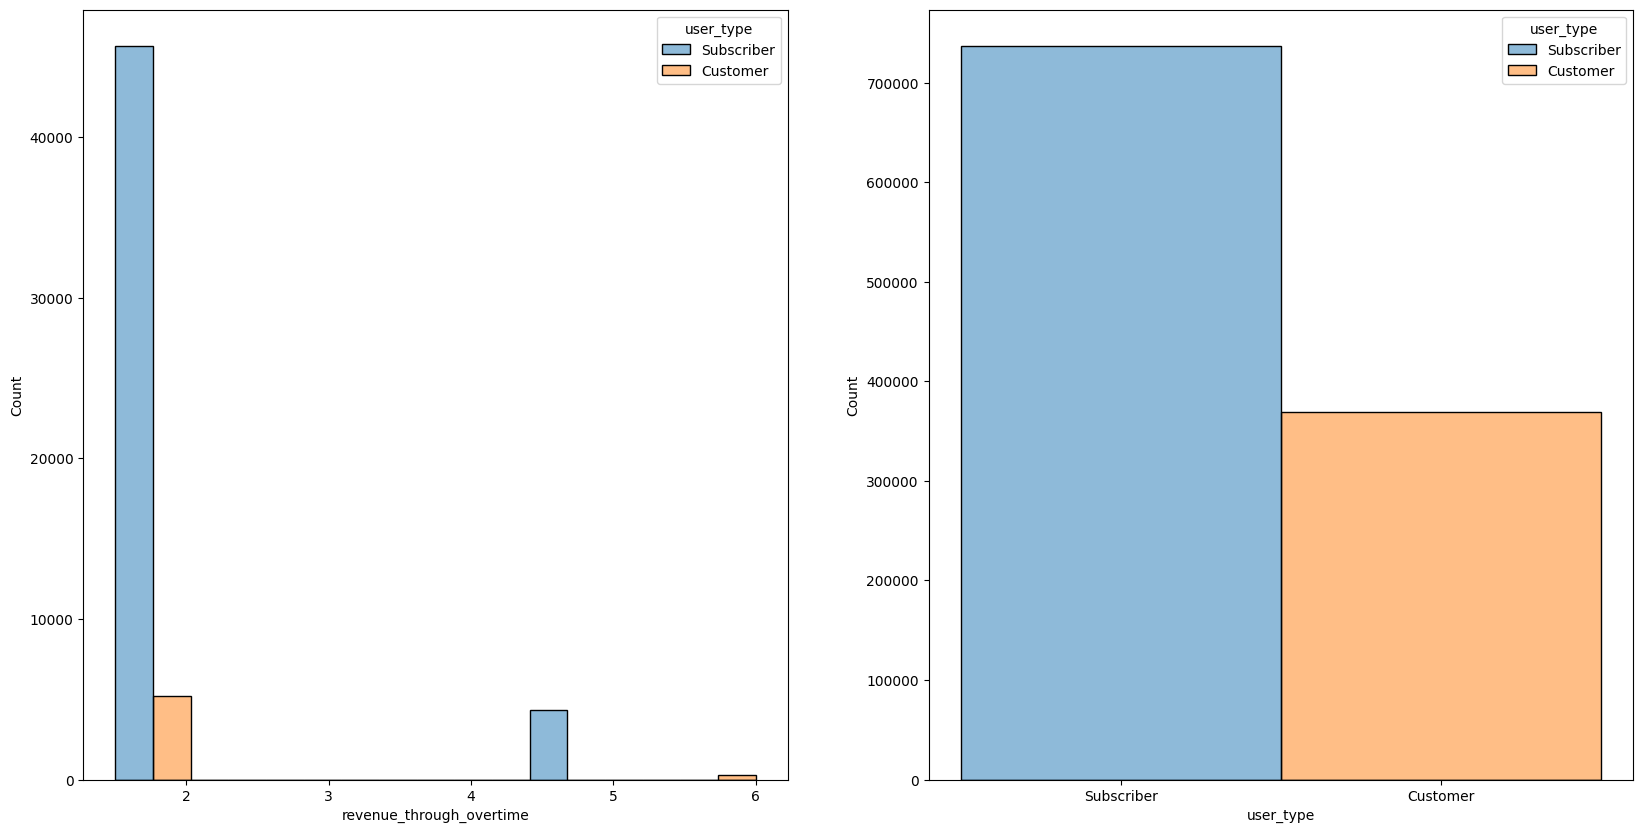

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.histplot(df_boston_only_overtime_rides, x='revenue_through_overtime', hue='user_type', ax=ax[0])
sns.histplot(df_boston, x='user_type', hue='user_type', ax=ax[1])

print(f'percent of userbase subscriber: {len(df_boston[df_boston["user_type"] == "Subscriber"])/len(df_boston)}')
print(f'percent of userbase Customer: {len(df_boston[df_boston["user_type"] == "Customer"])/len(df_boston)}')


print(f'total number of OT-Rides: {len(df_boston_only_overtime_rides)}')
print(f'total number of subscriber rides: {len(df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Subscriber"])}')
print(f'total number of customer rides: {len(df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Customer"])}')

print(f'percent of OT-rides from subscriber: {len(df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Subscriber"])/len(df_boston_only_overtime_rides)}')
print(f'percent of OT-rides from customer: {len(df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Customer"])/len(df_boston_only_overtime_rides)}')


print(f'sum of subscriber OT revenue: {df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Subscriber"]["revenue_through_overtime"].sum()}')
print(f'sum of customer OT revenue: {df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Customer"]["revenue_through_overtime"].sum()}')

print(f'percent of Subscriber OT revenue: {df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Subscriber"]["revenue_through_overtime"].sum()/df_boston_only_overtime_rides["revenue_through_overtime"].sum()}')
print(f'percent of customer OT revenue: {df_boston_only_overtime_rides[df_boston_only_overtime_rides["user_type"] == "Customer"]["revenue_through_overtime"].sum()/df_boston_only_overtime_rides["revenue_through_overtime"].sum()}')



As we can see in the histogramms, a disporportionally high percantage of overtime revenue generated stems from subscribers. While they make up roughly 66% of the overall userbase, they account for around 90% of the overtime rides. This ration is also reflected in the percent of total revenue generated by the subscribers (88.02%) which is sligthly lower than the the percent of total rides (90%) because of the 25% reduction in overtime fees for the subscribers.

Average Revenue per Ride: 1.802447993654685


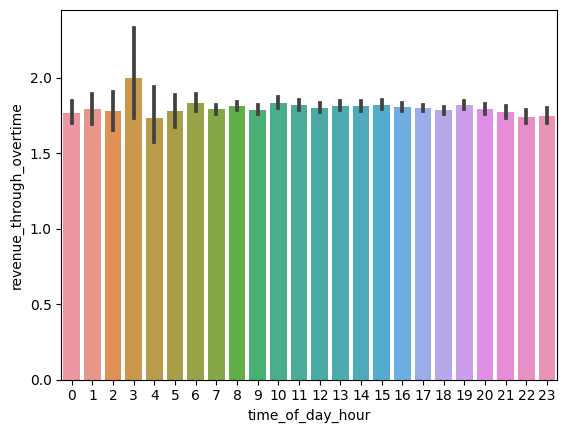

In [ ]:
# not much difference between the hours of the day
sns.barplot(data=df_boston_only_overtime_rides, x='time_of_day_hour', y='revenue_through_overtime')


print(f'Average Revenue per Ride: {df_boston_only_overtime_rides["revenue_through_overtime"].sum()/len(df_boston_only_overtime_rides["revenue_through_overtime"])}')

Looking at the distribution of overtimes revenue throughout an average day, we don't get any specifically interesting insights. Most of the hours hover slightly below the average of 1.802 Dollars per Ride, with the only exception of the nighttime between 1 am and 6 am showing divergence from this trend. 

C:\Users\Adrian\AppData\Local\Temp\ipykernel_13180\184307681.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_ot_rides_month_percentage = df_ot_rides_count_month.append(df_rentals_total_month)


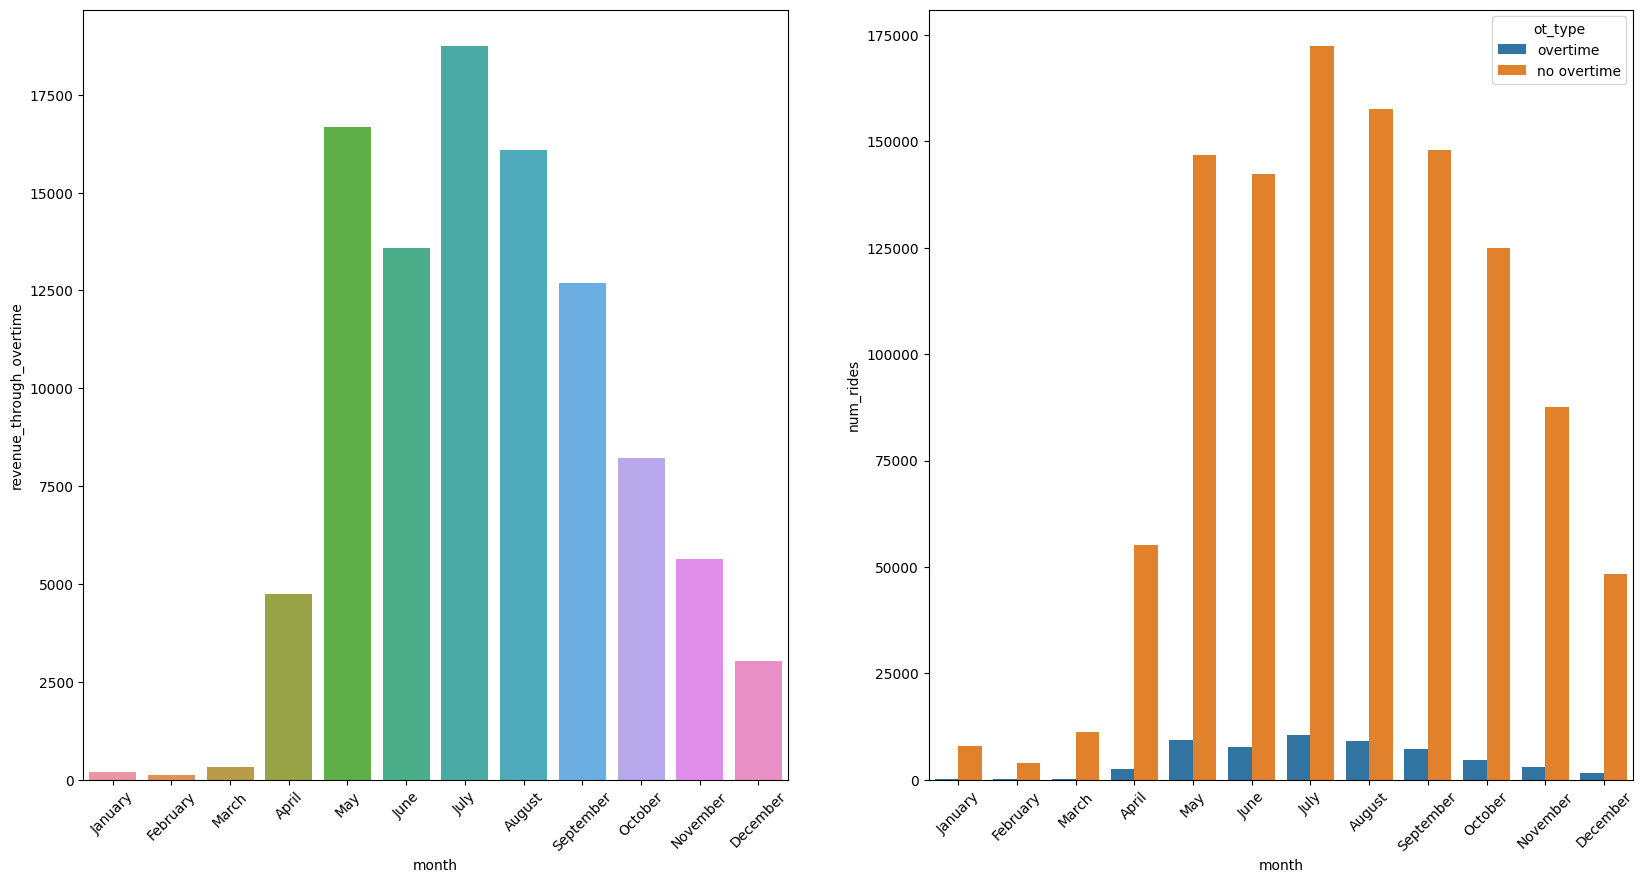

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))

# Count of rides per month
df_ot_rides_count_month = df_boston_only_overtime_rides.groupby(by='month').size().reset_index(name='num_rides')
df_ot_rides_count_month['month'] = pd.Categorical(df_ot_rides_count_month['month'], categories=['January', 'February', 'March' , 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_ot_rides_count_month['ot_type'] ='overtime'

# Second df to get total rides
df_rentals_total = df_boston.copy()
df_rentals_total['month'] = df_rentals_total['end_time'].dt.month_name()
df_rentals_total_month = df_rentals_total.groupby(['month']).size().reset_index(name='num_rides')
df_rentals_total_month['month'] = pd.Categorical(df_rentals_total_month['month'], categories=['January', 'February', 'March' , 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_rentals_total_month['ot_type'] ='no overtime'

# merge total df and cumsum df to get percentages per month
df_ot_rides_month_percentage = df_ot_rides_count_month.append(df_rentals_total_month)

# Sum of overtime revenue 
df_ot_rides_sum_month = df_boston_only_overtime_rides.groupby(by='month')['revenue_through_overtime'].sum().reset_index()
df_ot_rides_sum_month['month'] = pd.Categorical(df_ot_rides_count_month['month'], categories=['January', 'February', 'March' , 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
df_ot_rides_sum_month.sort_values('month')

sns.barplot(data=df_ot_rides_sum_month, x='month', y='revenue_through_overtime', ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(data=df_ot_rides_month_percentage, x='month', y='num_rides', hue='ot_type', ax=ax[1])
ax[1].tick_params(axis='x', rotation=45)

From the revenue generated (left Plot), we can see that during the winter month there is a lot less activity. Most of the revenue is generated in the summer months, with the highest revenue in August with around 18.000 Dollar. 



59             1.5
191            3.0
239            4.5
253            6.0
254            8.0
            ...   
1106079    99982.5
1106080    99984.0
1106084    99986.0
1106089    99987.5
1106090    99989.0
Name: renveue_cumsum, Length: 55474, dtype: float64


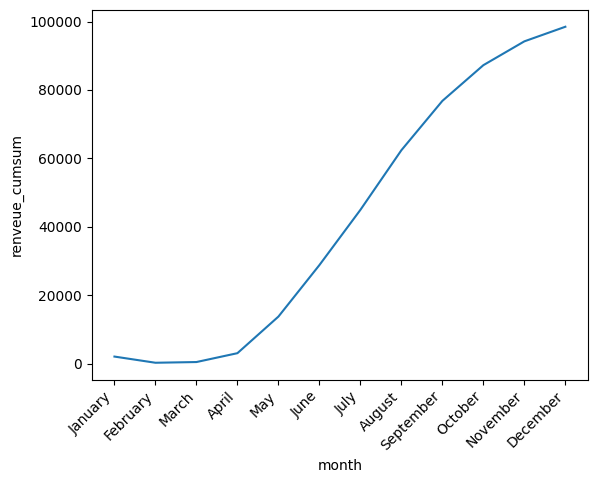

In [ ]:
import matplotlib.pyplot as plt



df_boston_only_overtime_rides['renveue_cumsum'] = df_boston_only_overtime_rides['revenue_through_overtime'].sort_index().cumsum(skipna=True)
sns.lineplot(data=df_boston_only_overtime_rides, x='month', y='renveue_cumsum', ci=None)
plt.xticks(rotation=45, ha='right')

print(df_boston_only_overtime_rides['renveue_cumsum'])

# TODO: fixme seaborn plot broken

### Clustering

### Correlation analysis between participatation and demand

In [ ]:
import pandas as pd
import numpy as np
import math
# Import Data Set

df_boston = pd.read_csv('./data/prepared/rides_data_prepared.csv', dtype={'start_station_id': np.int64, 'end_station_id': 'string', 'end_station_name': 'string', 'start_station_name': 'string', 'bike_id': np.int64, 'user_type': 'string'})
df_boston['start_time'] = pd.to_datetime(df_boston['start_time'], format='%Y-%m-%d %X')
 
df_boston.head()
# Setup Demand as no of bikes rented in the current hour
df_demand = df_boston.resample(rule='H', on='start_time').size().reset_index(name='demand')
df_demand.columns = ['date_time', 'demand']
df_demand.head()

# Include Weather Data
df_weather = pd.read_csv('./data/weather_hourly_boston.csv')

df_weather.head()
df_weather['date_time'] = pd.to_datetime(df_weather['date_time'], format='%Y-%m-%d %X')
df_demand = df_demand.merge(df_weather, how = 'inner', on = 'date_time')
df_demand.head()

# Calculate Demand Change
df_demand['demand_h-1'] = df_demand['demand'].shift(periods=1)
df_demand['demand_h-2'] = df_demand['demand'].shift(periods=2)

df_demand['demand_change_h-1'] = df_demand['demand'] / df_demand['demand_h-1']
df_demand['demand_change_h-2'] = df_demand['demand'] / df_demand['demand_h-2']

# Remove first two lines because no trailing
df_demand = df_demand[2::] 
# Remove all lines with infinity to not break further plotting
df_demand = df_demand[np.logical_and(df_demand['demand_change_h-1'] != math.inf, df_demand['demand_change_h-2'] != math.inf)]

df_demand.head()



,date_time,demand,max_temp,min_temp,precip,demand_h-1,demand_h-2,demand_change_h-1,demand_change_h-2
4,2015-01-01 10:00:00,8,-5.6,-5.6,0.0,2.0,4.0,4.000000,2.000000
5,2015-01-01 11:00:00,6,-5.0,-5.0,0.0,8.0,2.0,0.750000,3.000000
6,2015-01-01 12:00:00,11,-5.0,-5.0,0.0,6.0,8.0,1.833333,1.375000
7,2015-01-01 13:00:00,10,-5.6,-5.6,0.0,11.0,6.0,0.909091,1.666667
8,2015-01-01 14:00:00,21,-3.9,-3.9,0.0,10.0,11.0,2.100000,1.909091


C:\Users\Adrian\AppData\Local\Temp\ipykernel_19168\3263145801.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_demand.corr()


<AxesSubplot: >

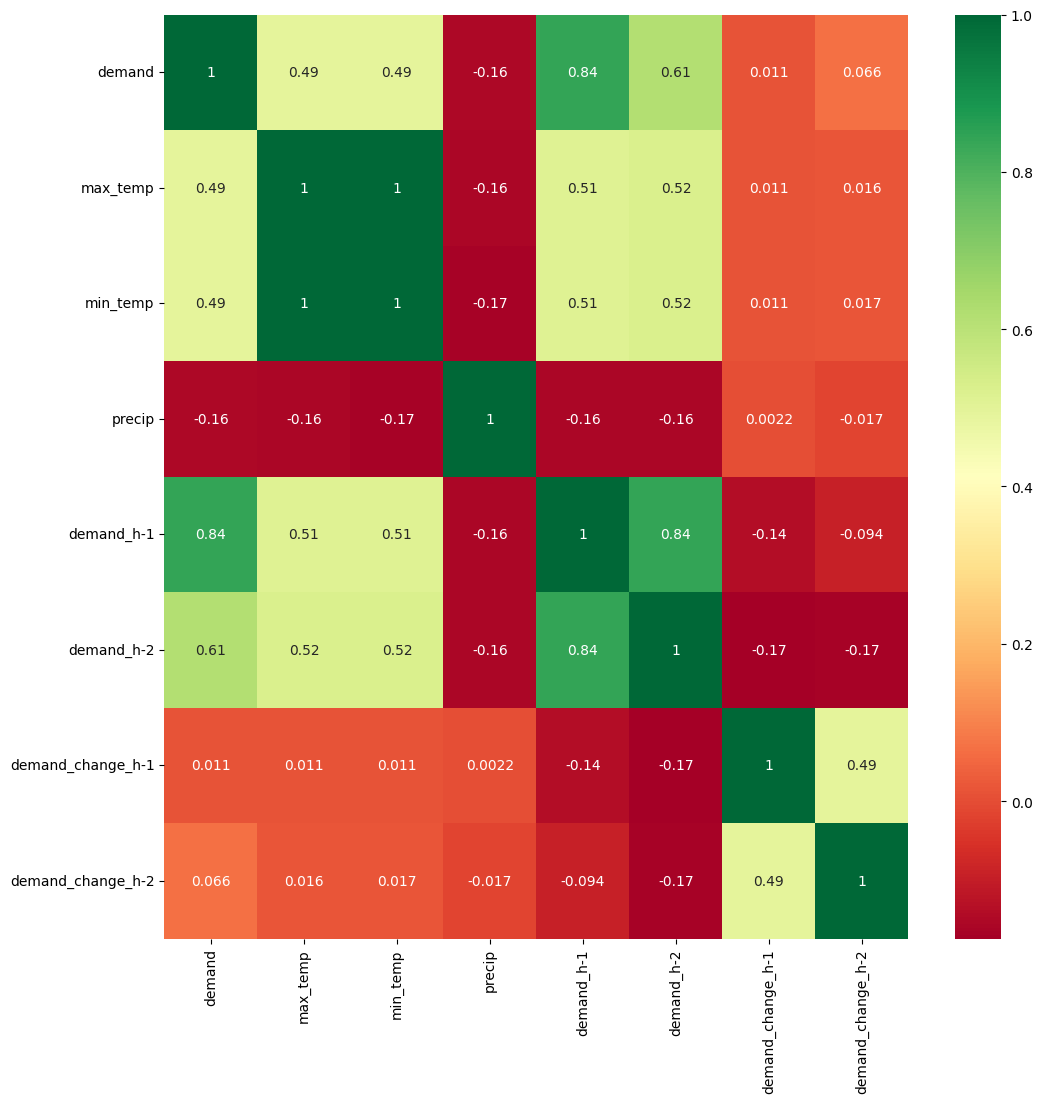

In [ ]:
# Get correlation for percip and h-1 and h-2 demands
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_demand.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(12,12))

sns.heatmap(df_demand[top_corr_features].corr(),annot=True,cmap="RdYlGn")
